# Explore here

In [37]:
# Your code here!pip install seaborn
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install pydotplus


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-pac

In [44]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import pydotplus
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, f1_score, accuracy_score, make_scorer
from sklearn import tree


In [6]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


EDA

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

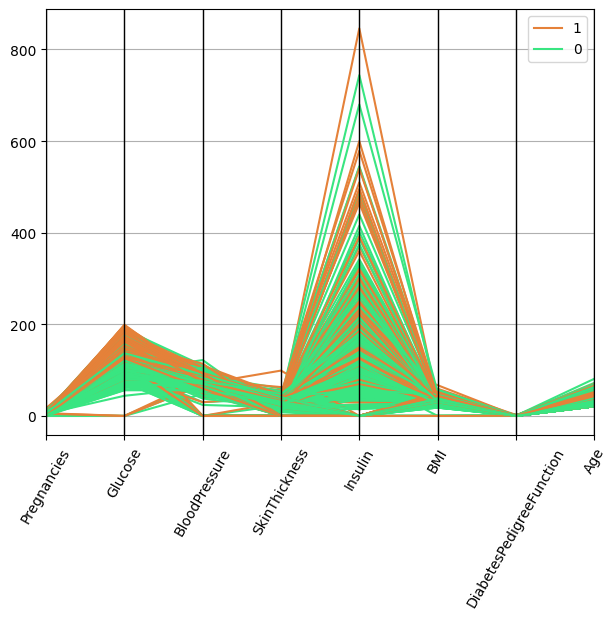

In [16]:
pd.plotting.parallel_coordinates(df, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))
plt.tight_layout()
plt.xticks(rotation=60)


Machine Learning


In [17]:
# We divide the dataset into training and test samples
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


<Axes: ylabel='Frequency'>

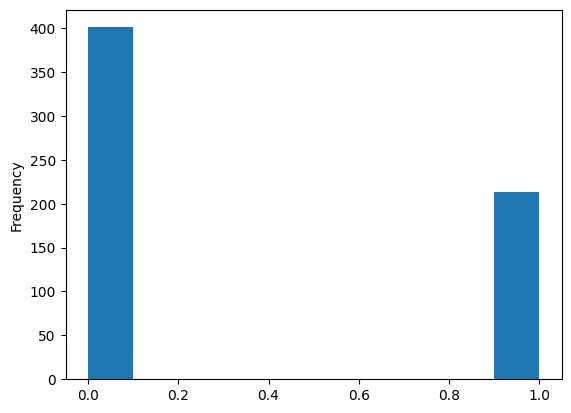

In [18]:
y_train.plot.hist()

<Axes: ylabel='Frequency'>

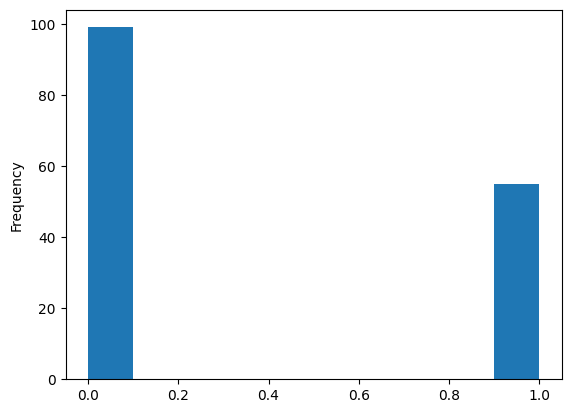

In [19]:
y_test.plot.hist()

In [20]:
X_train.to_csv("X_Train.csv")
y_train.to_csv("y_train.csv")
X_test.to_csv("X_test.csv")
y_test.to_csv("y_test.csv")

In [ ]:
"""
selection_model = SelectKBest(f_classif, k = 58)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train.head()
"""

In [22]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

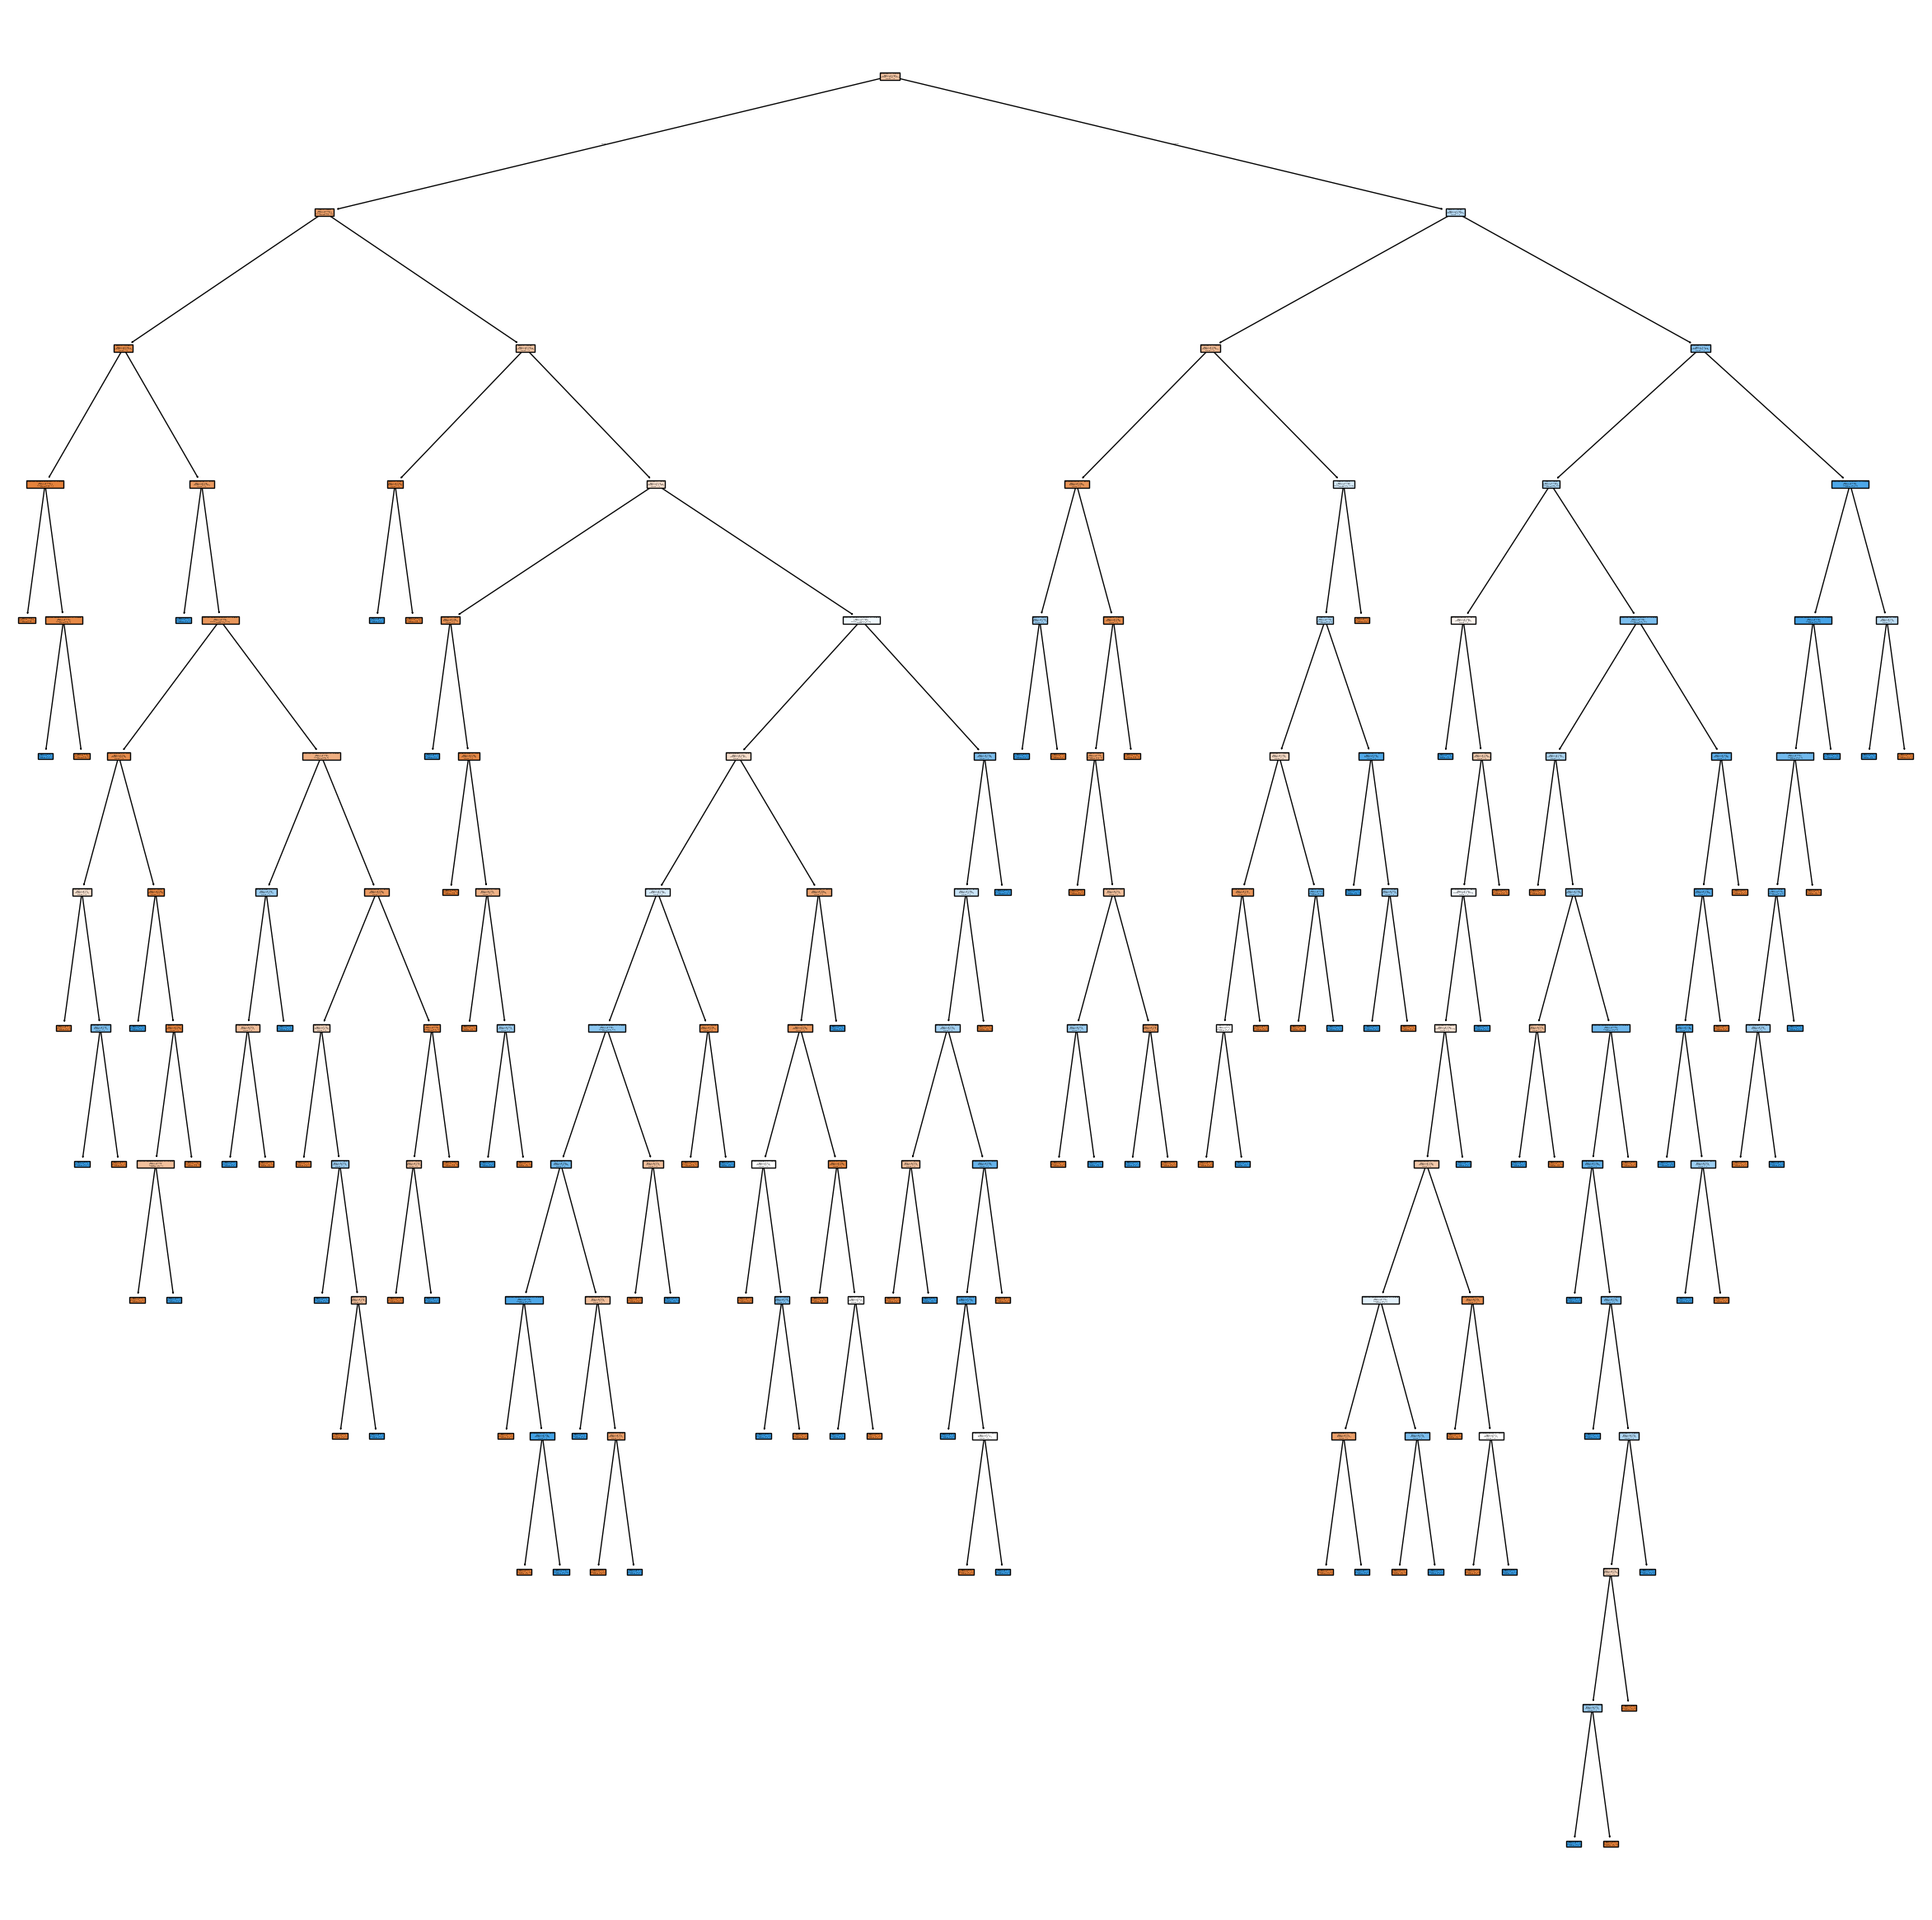

In [28]:
fig = plt.figure(figsize=(30,30))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
plt.savefig("diabetes.jpg")
plt.show()

In [45]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=feature_name,
                         class_names=target_name,
                         filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    plt.savefig("./dt.png")
    return Image(graph.create_png())

In [47]:
#new_model = plot_decision_tree(model,X_train.columns, ["0","1"])

In [54]:
class_train_pred = model.predict(X_train)
class_test_pred = model.predict(X_test)

In [55]:
print('The Training F1 Score is', f1_score(class_train_pred, y_train))
print('The Testing F1 Score is', f1_score(class_test_pred, y_test))

The Training F1 Score is 1.0
The Testing F1 Score is 0.6722689075630253


In [58]:
print('The Accuracy Score is', accuracy_score(class_train_pred, y_train))
print('The Accuracy Score is', accuracy_score(class_test_pred, y_test))

The Accuracy Score is 1.0
The Accuracy Score is 0.7467532467532467


In [60]:
#Random Search HyperParameters
parameters = {
              'max_depth':[1,2,3,4,5],
              'min_samples_leaf':[1,2,3,4,5],
              'min_samples_split':[2,3,4,5],
              'criterion' : ['gini','entropy']
             }
scorer = make_scorer(f1_score)

In [62]:
random = RandomizedSearchCV(model, parameters, scoring=scorer)

In [66]:
# Fit the model to your data
random_out = random.fit(X_train, y_train)
random_out

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5]},
                   scoring=make_scorer(f1_score, response_method='predict'))

In [68]:
best = random_out.best_estimator_
best

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=4,
                       random_state=42)

In [70]:
class_train_pred = best.predict(X_train)
class_test_pred = best.predict(X_test)

In [71]:
print('The Training F1 Score is', f1_score(class_train_pred, y_train))
print('The Testing F1 Score is', f1_score(class_test_pred, y_test))

The Training F1 Score is 0.7371134020618557
The Testing F1 Score is 0.6862745098039216


In [72]:
print('The Accuracy Score is', accuracy_score(class_train_pred, y_train))
print('The Accuracy Score is', accuracy_score(class_test_pred, y_test))

The Accuracy Score is 0.8338762214983714
The Accuracy Score is 0.7922077922077922


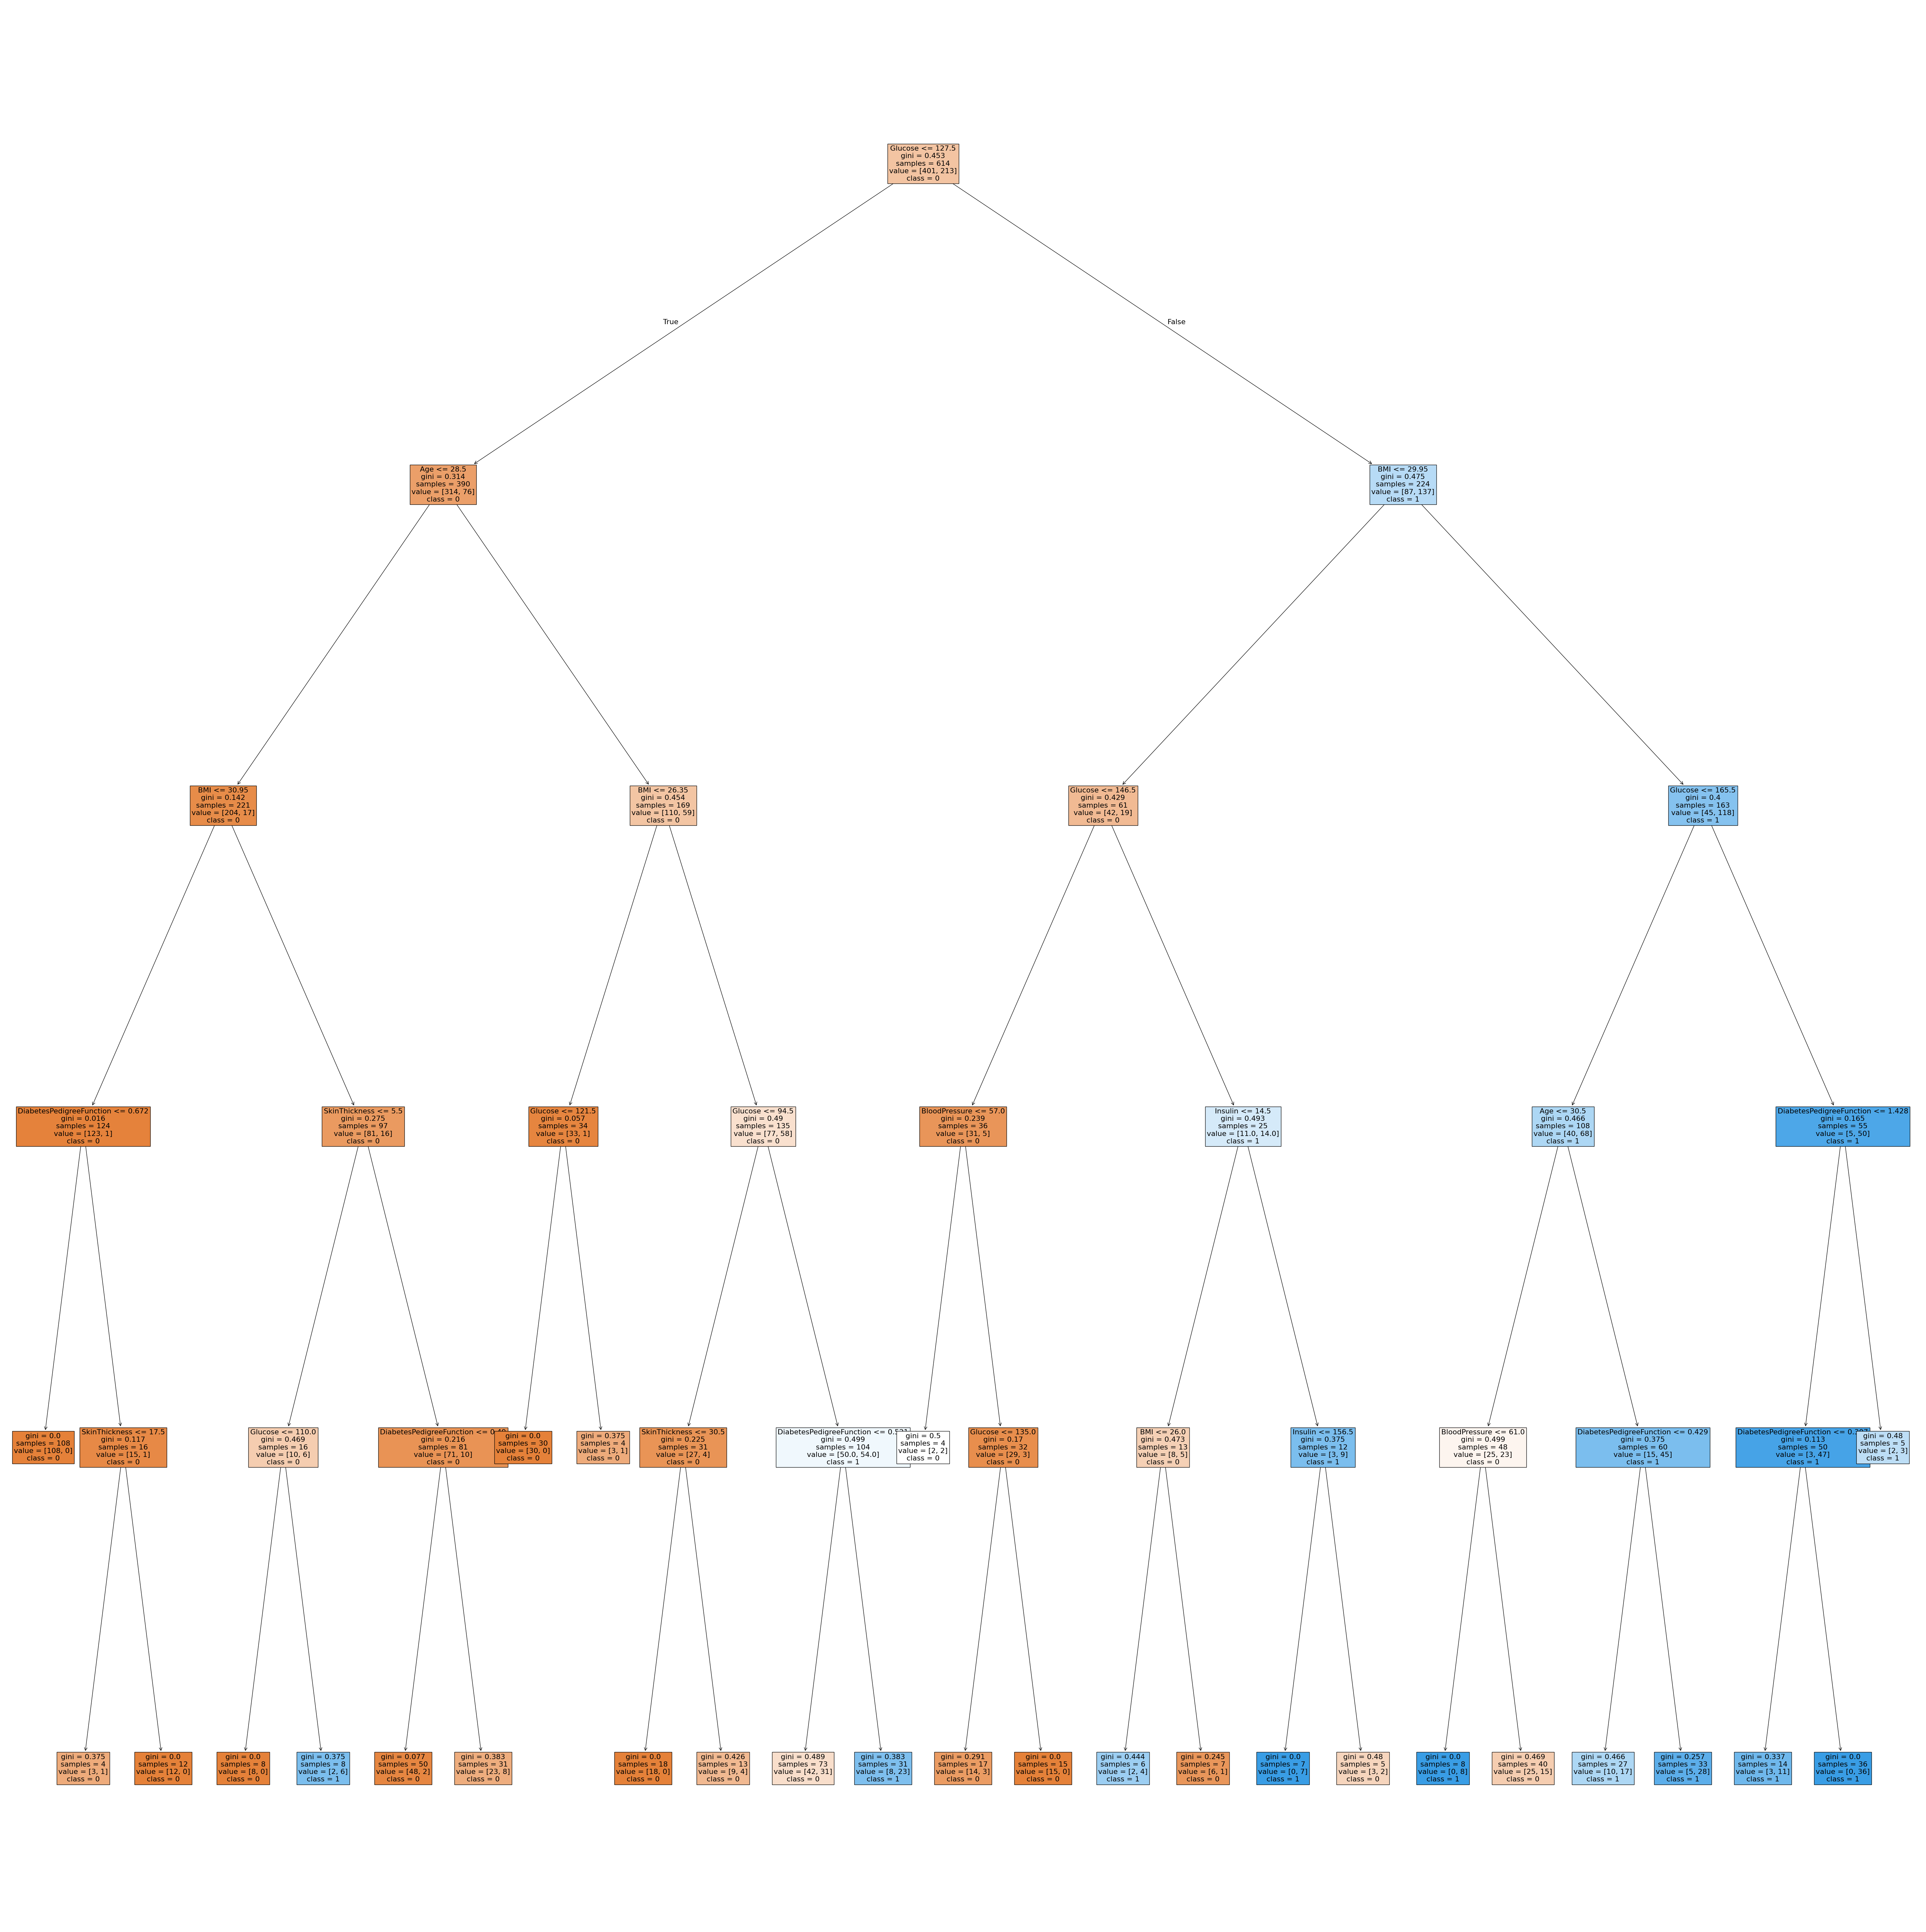

In [79]:
fig = plt.figure(figsize=(60,60))

tree.plot_tree(best, feature_names = list(X_train.columns), class_names = ["0", "1"],fontsize=16, filled = True)
plt.savefig("diabetes_best.jpg")
plt.tight_layout()
plt.show()

In [ ]:
#dump(model, open("decision_tree_classifier_default_42.sav", "wb"))